# Lösungsvorschlag 01: AND

### Importiere Bibliotheken

In [1]:
import numpy as np

from keras.models import Sequential, InputLayer
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras import losses

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Definiere Eingabe und die erwartete Ausgabe

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([ [0],  [0],  [0],  [1]])

### Definiere das Modell

In [3]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
print(model.layers[1].get_weights())

[array([[0.38632917],
       [0.07602584]], dtype=float32), array([0.], dtype=float32)]


### Konfiguriere den Lernalgorithmus

In [6]:
adam = Adam(lr=0.3)
model.compile(loss=losses.mean_squared_error, optimizer=adam)


### Lass dein Modell lernen

In [7]:
history = model.fit(X, Y, epochs=1000, verbose=0)

### Testphase

In [8]:
print(model.predict(X))

[[1.4154125e-06]
 [1.0695978e-02]
 [1.0790867e-02]
 [9.8814118e-01]]


In [9]:
print(model.layers[1].get_weights())

[array([[8.9498825],
       [8.940954 ]], dtype=float32), array([-13.468088], dtype=float32)]


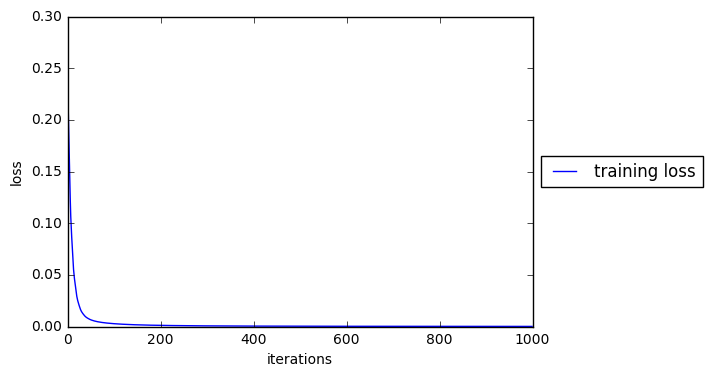

In [10]:
plt.plot(history.history['loss'], label='training loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()